In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data(n, p=0.2):
    #产生20个随机数
    X = np.random.uniform(-1, 1, size=(n))
    #产生(X, y)，注意有p的误差
    y = np.sign(X)
    prob = np.random.uniform(0, 1, n)
    y[prob < p] *= -1
    return X, y

#产生theta，注意这里只要取n个点相邻两点间的点n-1个点以及两侧的两个点即可
def Theta(X):
    theta = (X[1:] + X[:-1]) / 2
    theta = np.r_[[X[0] - 1], theta]
    theta = np.r_[theta, [X[-1] + 1]]
    
    #修改维度后范围
    return theta.reshape(-1, 1)

def decision_stump(X, y):
    #排序
    X1 = np.sort(X)
    #计算theta
    theta = Theta(X1)
    #向量化执行计算
    n = theta.shape[0]
    m = X.shape[0]
    #将X复制按横轴n份
    X = np.tile(X, (n, 1))
    #s=1
    y1 = np.sign(X - theta)
    #s=-1
    y2 = np.sign(X - theta) * (-1)
    #统计错误
    error1 = np.sum(y1!=y, axis = 1)
    error2 = np.sum(y2!=y, axis = 1)
    #计算最小错误对应的下标
    i1 = np.argmin(error1)
    i2 = np.argmin(error2)
    #判断哪个误差更小
    if error1[i1] < error2[i2]:
        s = 1
        t = theta[i1][0]
        error = error1[i1] / m
    else:
        s = -1
        t = theta[i2][0]
        error = error2[i2] / m
    return s, t, error

In [2]:
Ein = []
Eout = []
n = 20
m = 5000
for i in range(m):
    X, y = data(n)
    s, t, ein = decision_stump(X, y)
    #计算eout
    eout = 0.5 + 0.3 * s * (np.abs(t) - 1)
    Ein.append(ein)
    Eout.append(eout)

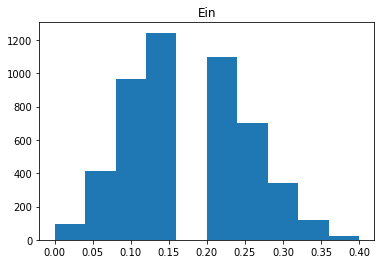

0.17018


In [3]:
#Problem 17
plt.hist(Ein)
plt.title('Ein')
plt.show()

print(np.mean(Ein))

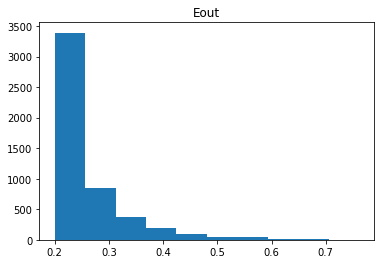

0.25670740955846166


In [4]:
#Problem 18
plt.hist(Eout)
plt.title('Eout')
plt.show()

print(np.mean(Eout))